In [12]:
#Introduction:The overall idea of regression is to examine two things: 
#(1) does a set of predictor variables do a good job in predicting an outcome (dependent) variable? 
#(2) Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated 
#by the magnitude and sign of the beta estimates–impact the outcome variable? 
#These regression estimates are used to explain the relationship between one dependent variable and one or more independent
#variables.

#Regressions Performed
#Simple Linear Regression:‘bedrooms’ vs ‘price’,‘grade’ vs ‘price’

#Multiple Regression:‘bedrooms’,’grade’, ‘sqft_living’, ‘sqft_above’;
#‘bedrooms’,’bathrooms’, ‘sqft_living’, ‘sqft_lot’, ‘floors’, ‘waterfront’, ‘view’, ‘grade’, ‘sqft_above’, ‘sqft_basement’, ‘lat’, ‘sqft_living15’
#Polynomial Regression:degree=2,degree=3

In [13]:
#Description:
#By observing the data, we can know that the price is dependent on various features like bedrooms
#(which is most dependent feature), bathrooms, sqft_living(second most important feature), 
#sqft_lot, floors etc. The price is also dependent on the location of the house where it is present. 
#The other features like waterfront, view are less dependent on the price.


In [7]:
#Data Preprocessing
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv("kc_house_data.csv")

In [9]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 2.6 MB


In [10]:
#Pandas head() method is used to return top n (5 by default) rows of a data frame or series.

df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [11]:
#Pandas shape fucntion isused to return size, shape and dimensions of data frames and series.

#finding no of rows and columns
df.shape

(21613, 16)

In [6]:
#Calling sum() of the DataFrame returned by isnull() will give a series containing data about count of NaN in each column.

df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
df['bedrooms'].value_counts()


bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [13]:
#count of waterfront
df['waterfront'].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [14]:
#counts of grade
df['grade'].value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

In [15]:
#count of condition
df['condition'].value_counts()

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

<Axes: xlabel='bedrooms', ylabel='count'>

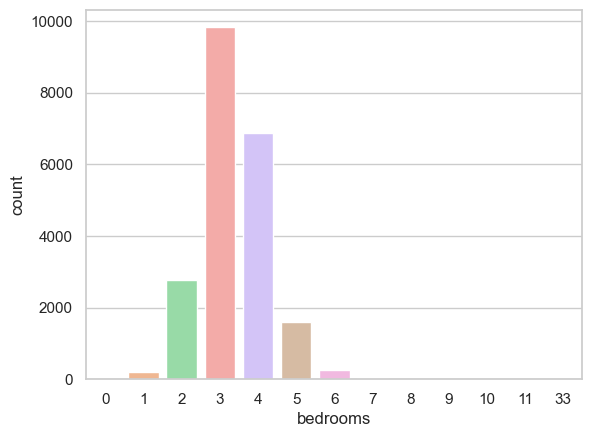

In [16]:
#a counplot is plotted for bedrooms
sns.set(style="whitegrid")
sns.countplot(df,x='bedrooms',palette='pastel')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: title={'center': 'house prices by sqft_living'}, xlabel='sqft_living', ylabel='price'>

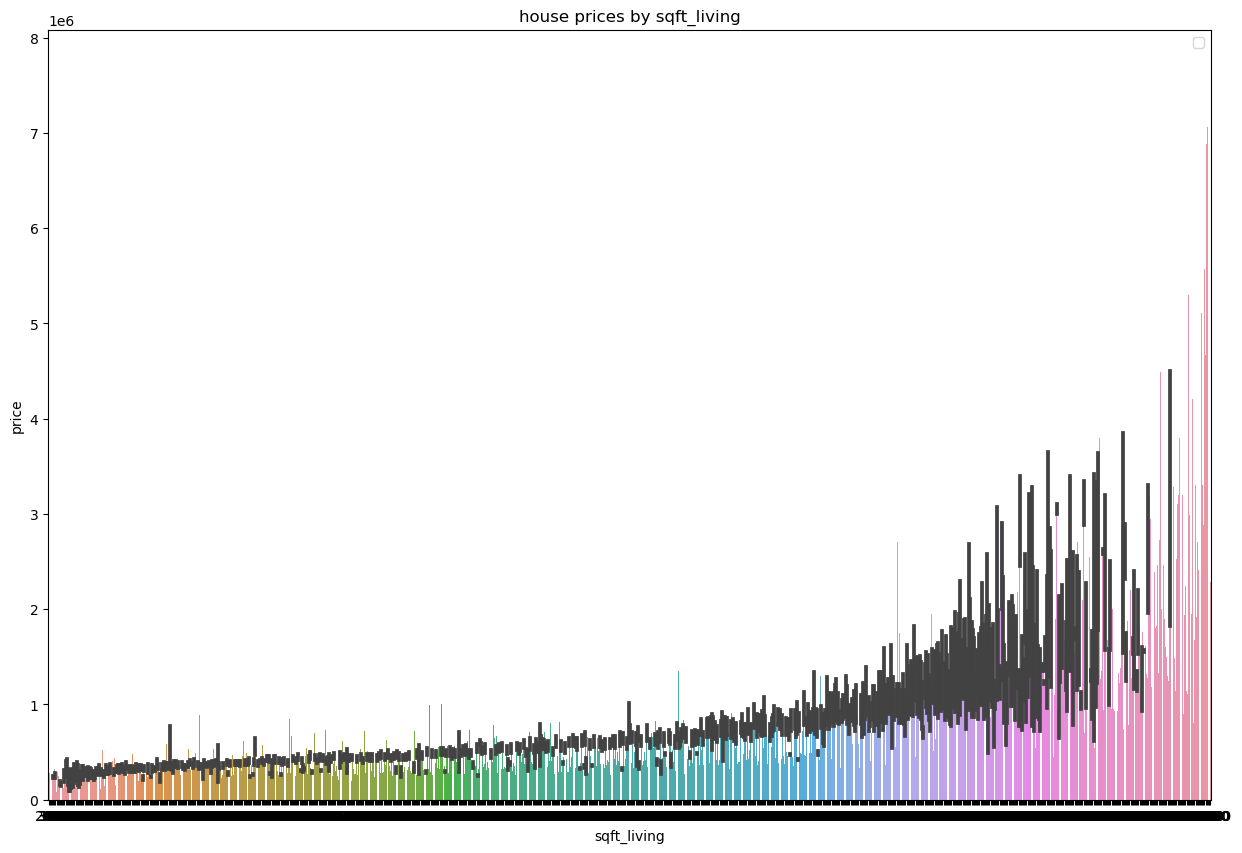

In [34]:
#A barplot is plotted between sqft living and prices to get an overview of how the price changes with sqft.
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_living")
plt.xlabel('sqft_living')
plt.ylabel('house prices')
plt.legend()
sns.barplot(x='sqft_living',y='price',data=df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: title={'center': 'house prices by sqft_above'}, xlabel='sqft_above', ylabel='price'>

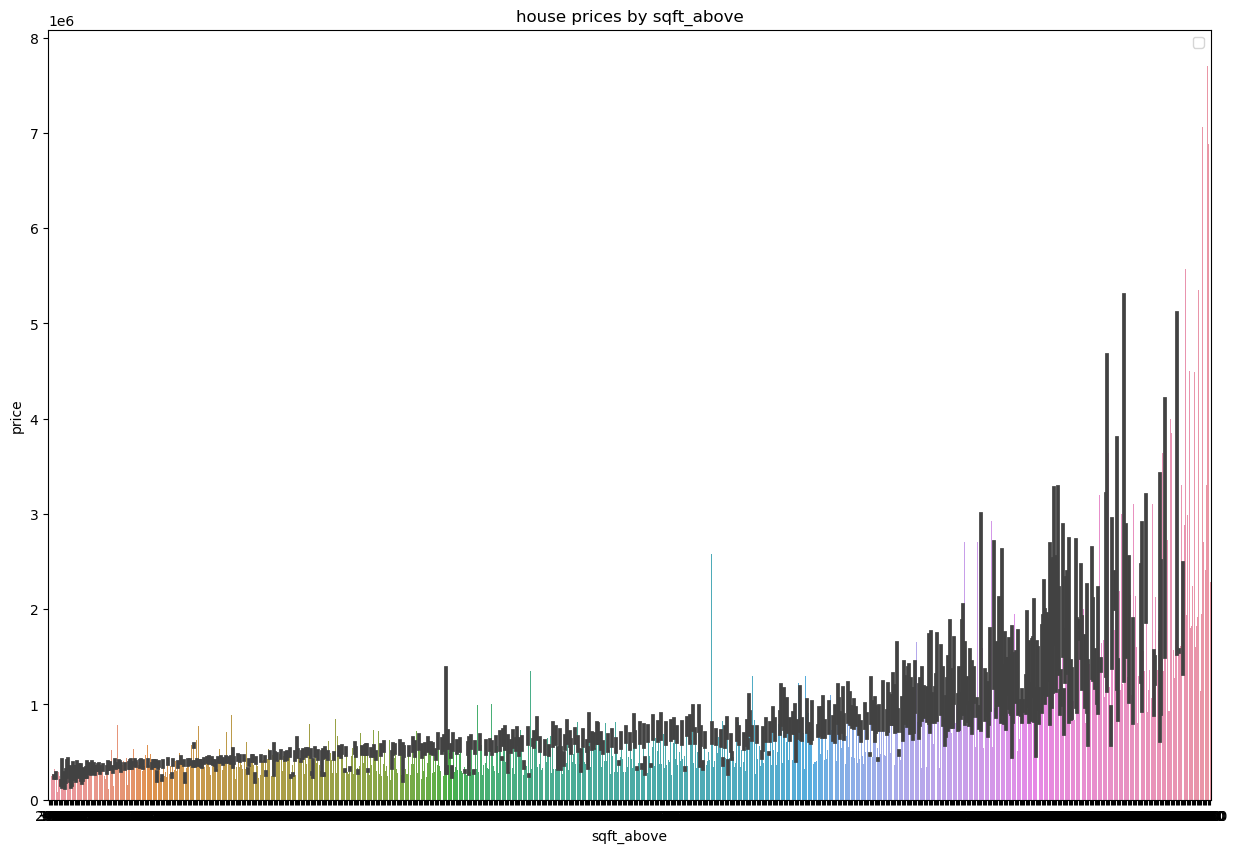

In [19]:
#A barplot is plotted between sqft living and prices to get an overview of how the price changes with sqft.


#A barplot is plotted between the sqft above and prices to see how the price changes with the sqft above.

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('house prices')
plt.legend()
sns.barplot(x='sqft_above',y='price',data=df)


(array([1.825e+04, 3.255e+03, 1.010e+02, 5.000e+00, 2.000e+00]),
 array([  290.,  2940.,  5590.,  8240., 10890., 13540.]),
 <BarContainer object of 5 artists>)

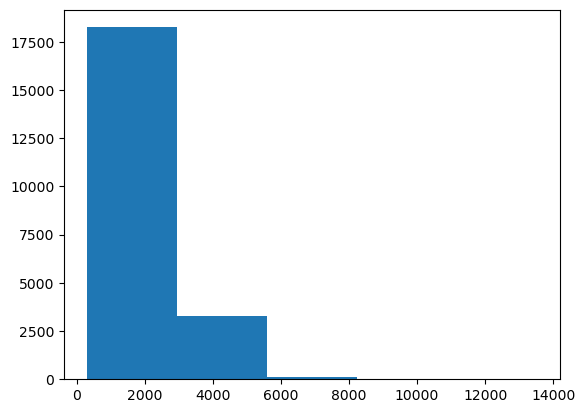

In [20]:
#A histogram is plotted for sqft living.

plt.hist('sqft_living',data=df,bins=5)

C:\Users\HP\AppData\Local\Temp\ipykernel_9836\6275946.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sqft_living'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)


<Axes: xlabel='sqft_living', ylabel='Density'>

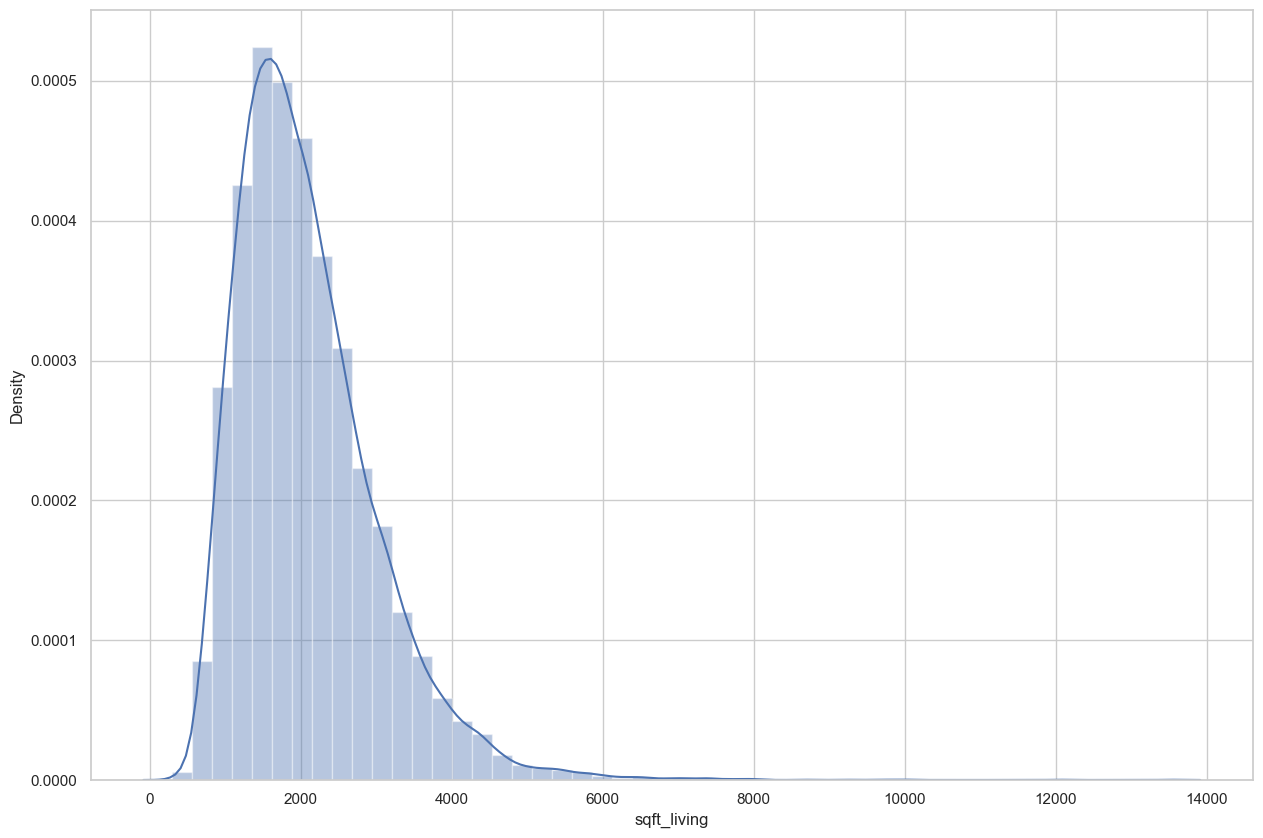

In [23]:
#A distplot is plotted for sqft living to see if the data is skewed or not

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(df['sqft_living'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_2804\1219487747.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sqft_above'],hist=True,kde=True,rug=False,label='sqft_above',norm_hist=True)


<Axes: xlabel='sqft_above', ylabel='Density'>

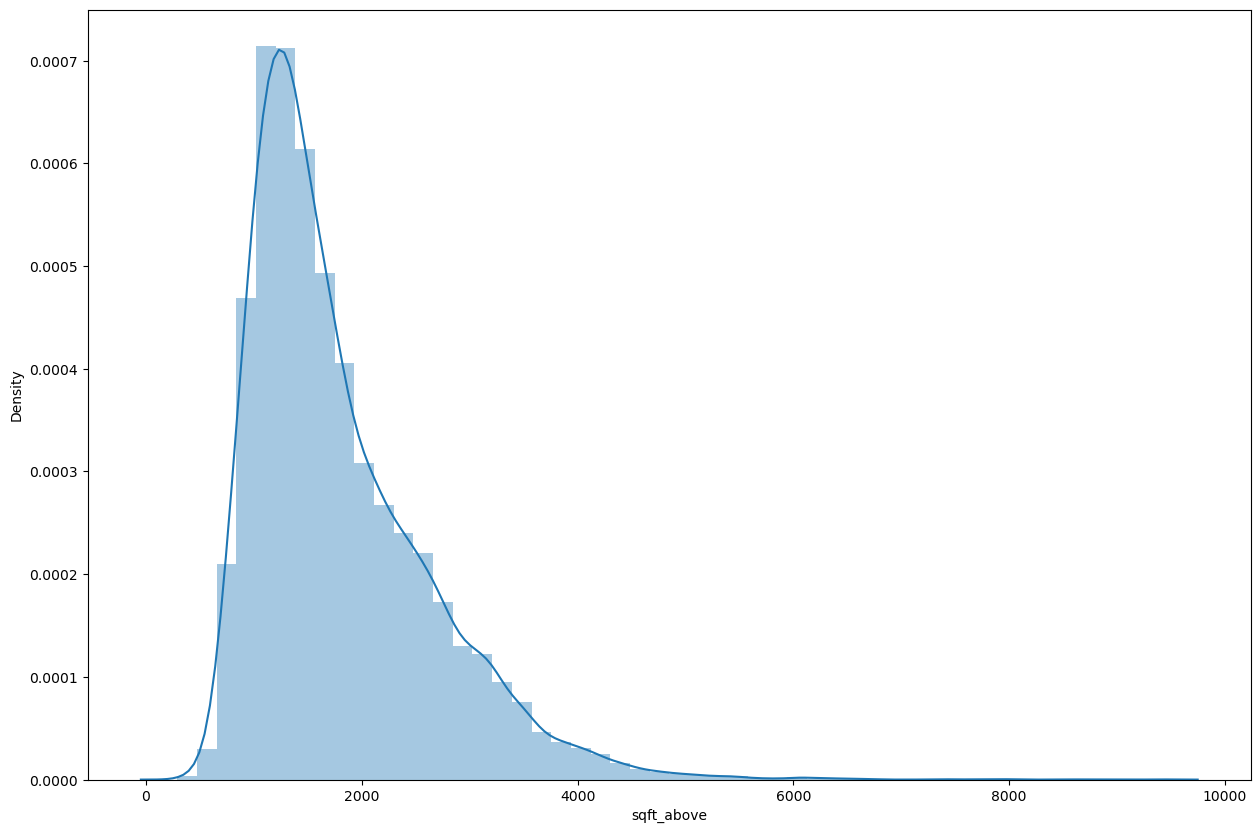

In [39]:
#A distplot is plotted for sqft above to see if the data is skewed or not

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(df['sqft_above'],hist=True,kde=True,rug=False,label='sqft_above',norm_hist=True)


In [23]:
#Finding the mean, mode and median of sqft living.

print('Mean',round(df['sqft_living'].mean(),2))
print('Median',df['sqft_living'].median())
print('Mode',df['sqft_living'].mode()[0])

Mean 2079.9
Median 1910.0
Mode 1300


In [24]:
#Through graphs we observe that the sqft living=1300 has more values.

len(df[df['sqft_living']==1300])

138

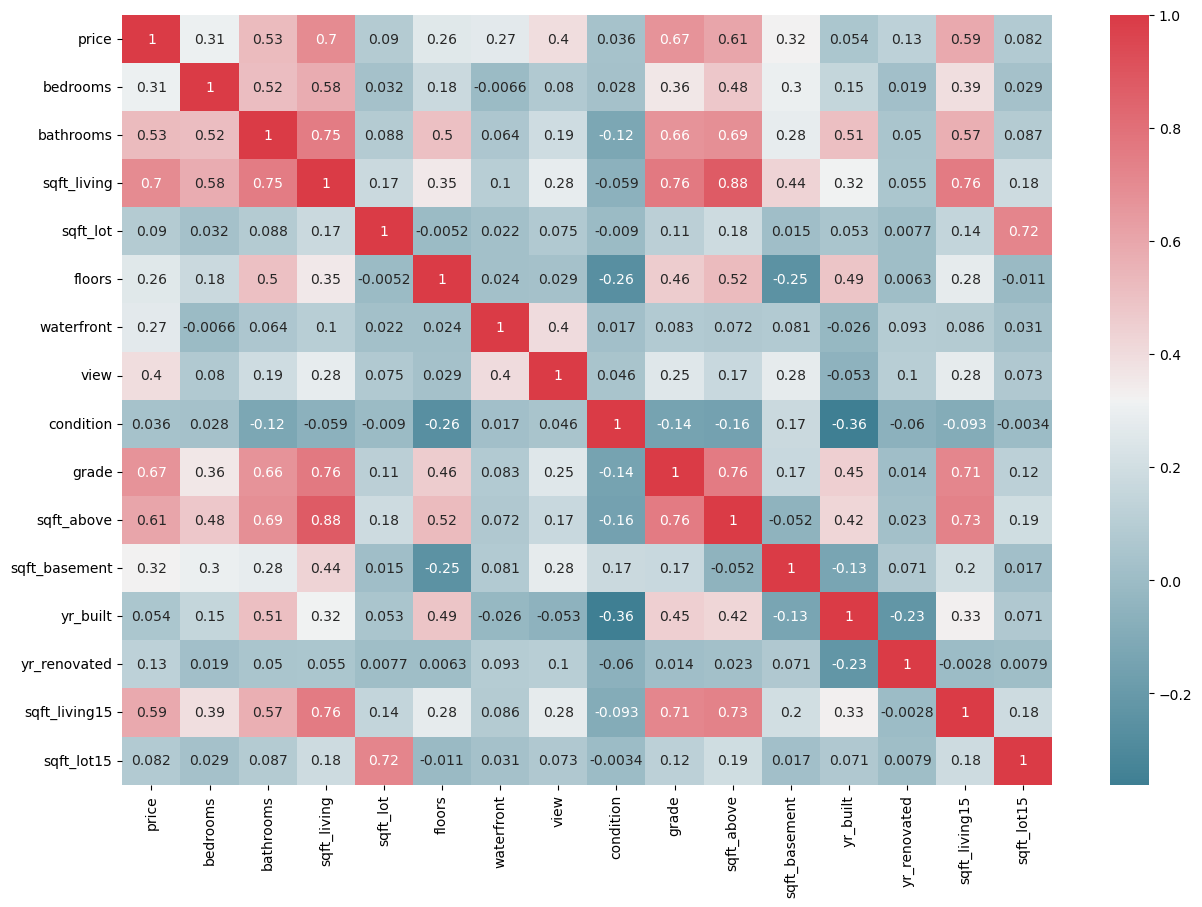

In [25]:
#Making sure we covered all the relations, we plot a correlation between all the features using a heatmap.

#A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors.

def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(df)

In [40]:
#Now that we have got enough inofrmation about the data, we start linear regression.

#Simple Linear Regression:For linear Regression, we are using linear_model from sklearn function.

#Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn. Extensions or modules for SciPy care conventionally named SciKits. As such, the module provides learning algorithms and is named scikit-learn.

#We import train_test_split. This splits the data into required ratio (ex: 80–20), of which a certain ratio is considered for training the data, and the rest for testing the data. The data is trained to predict a line and then the test data is used to see if the line fits perfectly or not.

#PolynomialFeatures generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

#The metrics is imported as the metric module implements functions assessing prediction error for specific purposes.

#In KNeighborsRegressor the target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.


In [18]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline


In [19]:
##Here we splitting the data into 80:20 ratio of which train_size is 80%, test_size is 20%. train_test_split splits arrays or matrices into random train and test subsets. That means that everytime you run it without specifying random_state , you will get a different result, this is expected behavior. In order to get the same train ans test subsets we declare a random state. Here the x is ‘sqft_living’ and y is ‘price’. We are reshaping the x_train and y_train and the data is fitted. The x_test and y_test are used to predict the accuracy of the model. Here first we are calculating the squared mean error of y_test. The squared mean error for training and test are found. The intercept and coefficient of the line are found.

train_data,test_data=train_test_split(df,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['sqft_living']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

LinearRegression()

In [20]:
x_test=np.array(test_data['sqft_living']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')

linear model


In [68]:
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R sqaured testing',round(reg.score(x_test,y_test),3) )
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

Sqaured mean error 254289.15
R squared training 0.492
R sqaured testing 0.496
intercept [-47235.8113029]
coefficient [[282.2468152]]


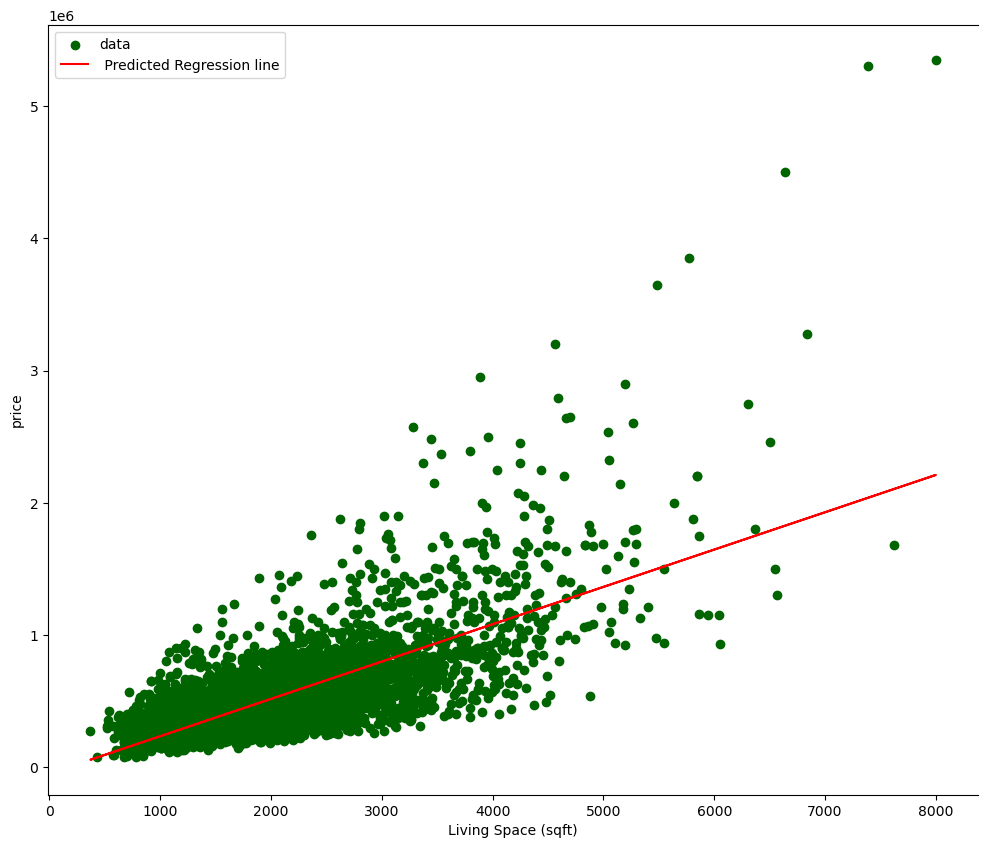

In [69]:
#A scatterplot graph is plotted for x_test, y_test. The data is spread over the graph. Now the line obtained from above is plotted to see how it fits for the data.

_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [70]:
#Here we are splitting the data in 80:20 ratio, of which train_size is 80% and test_size is 20%. Here x is ‘grade’ and y is ‘price’. We are reshaping the x_train and y_train and the data is fitted. The x_test and y_test are used to predict the accuracy of the model. Here first we are calculating the squared mean error of y_test. The squared mean error for training and test are found. The intercept and coefficient of the line are found.

train_data,test_data=train_test_split(df,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['grade']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

LinearRegression()

In [71]:
x_test=np.array(test_data['grade']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('squared mean error',round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R squared testing',round(reg.score(x_test,y_test),3))
print('intercept',reg.intercept_)
print('coeeficient',reg.coef_)


linear model
squared mean error 263387.61
R squared training 0.442
R squared testing 0.46
intercept [-1061459.62144308]
coeeficient [[209225.48270385]]


<Axes: xlabel='bathrooms', ylabel='price'>

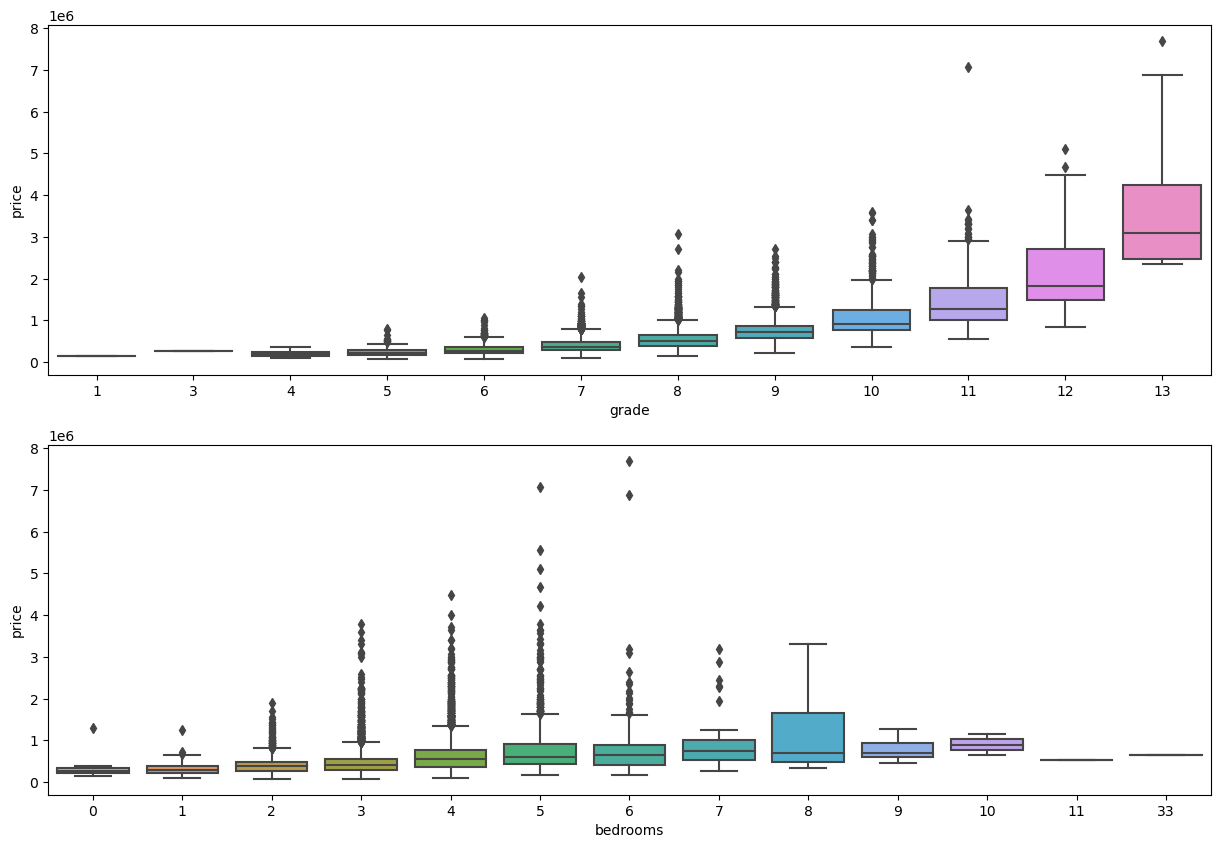

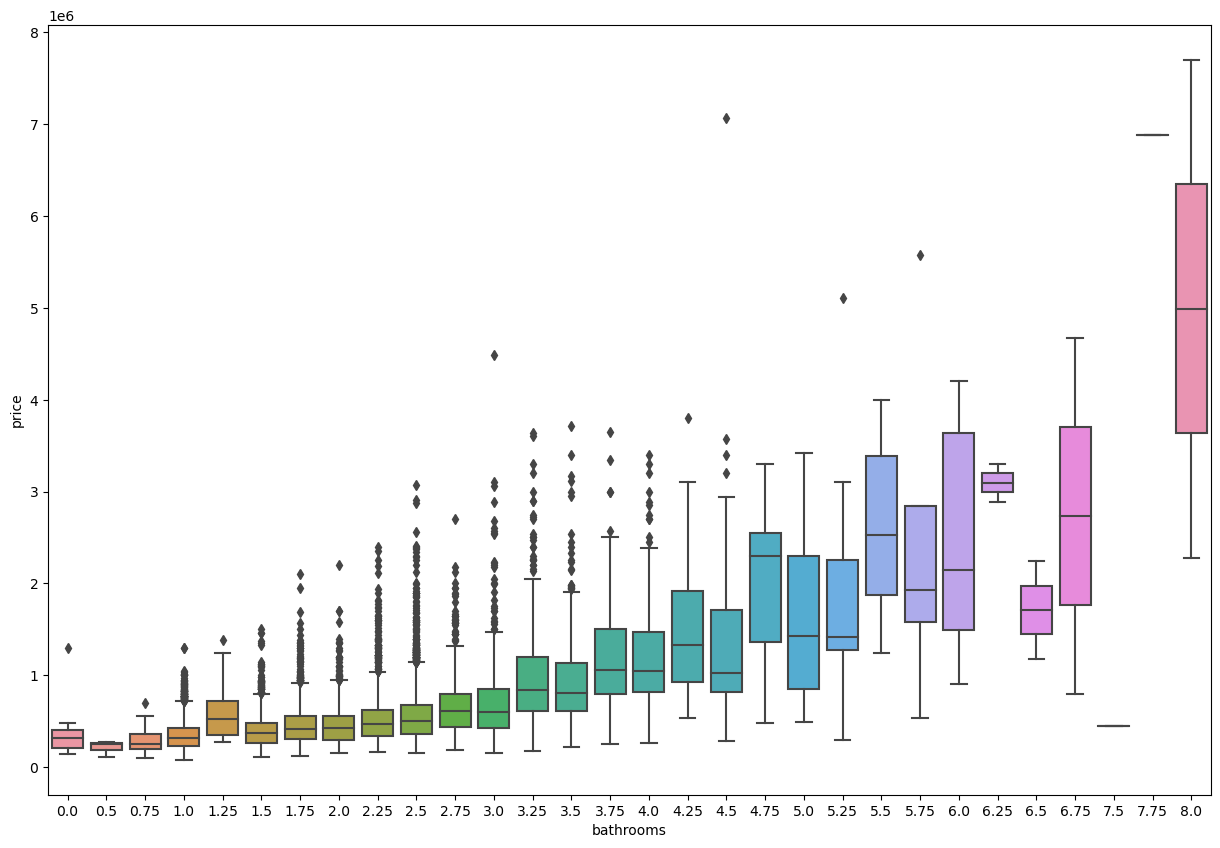

In [72]:
#Multiple Linear Regression

#The boxplot is plotted for ‘grade’, ‘bedrooms’ and ‘bathrooms’ with respective to ‘price’.

fig,ax=plt.subplots(2,1,figsize=(15,10))
sns.boxplot(x=train_data['grade'],y=train_data['price'],ax=ax[0])
sns.boxplot(x=train_data['bedrooms'],y=train_data['price'],ax=ax[1])
_ , axes = plt.subplots(1, 1, figsize=(15,10))
sns.boxplot(x=train_data['bathrooms'],y=train_data['price'])



In [73]:
#The features we are considering are ‘bedrooms’, ‘grade’, ‘sqft_living’ and ‘sqft_above’.
#These are considered are one feature namely features1.
#Now the data is fitted into the model and test_data of features1 are used for prediction. 
#Mean squared error is calculated for y_test. The mean squared error is rounded of upto 2 decimals.
#R squared error for both training and test is calculated 
#The intercept of the line is calculated along with coefficient of individual feature.

features1=['bedrooms','grade','sqft_living','sqft_above']
reg=linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred=reg.predict(test_data[features1])
print('complex_model 1')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('mean squared error(MSE)', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(train_data[features1],train_data['price']),3))
print('R squared training', round(reg.score(test_data[features1],test_data['price']),3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

complex_model 1
mean squared error(MSE) 239014.4
R squared training 0.548
R squared training 0.555
Intercept:  -523645.78414686455
Coefficient: [-4.33050242e+04  1.03455986e+05  2.73023590e+02 -8.38875593e+01]


In [74]:
#The features we are considering are ‘bedrooms’, ’bathrooms’, ’sqft_living’, ’sqft_lot’, ’floors’, ’waterfront’, ’view’, ’grade’, ’sqft_above’, ’sqft_basement’, ’lat’,’sqft_living15'. These are considered are one feature namely features2. Now the data is fitted into the model and test_data of features2 are used for prediction. Mean squared error is calculated for y_test. The mean squared error is rounded of upto 2 decimals. R squared error for both training and test is calculated. The intercept of the line is calculated along with coefficient of individual feature.

features2 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']
reg= linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred = reg.predict(test_data[features1])
print('Complex Model_2')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(train_data[features1], train_data['price']), 3))
print('R-squared (testing) ', round(reg.score(test_data[features1], test_data['price']), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)


Complex Model_2
Mean Squared Error (MSE)  239014.4
R-squared (training)  0.548
R-squared (testing)  0.555
Intercept:  -523645.78414686455
Coefficient: [-4.33050242e+04  1.03455986e+05  2.73023590e+02 -8.38875593e+01]


In [88]:
#Polynomial Regression

#Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x).
#For degree=2, the linear modelis built. The mean squared error is calculated and r squared is found for training and testing.
features1=['bedrooms','grade','sqft_living','sqft_above']
polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('Complex Model_3')

mean_squared_error = metrics.mean_squared_error(test_data['price'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

Complex Model_3
Mean Squared Error (MSE)  221965.07
R-squared (training)  0.614
R-squared (testing)  0.616


In [86]:
#For degree=3, the linear model is built. The mean squared error is calculated and r squared is found for training and testing.

polyfeat=PolynomialFeatures(degree=3)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('complex model_4')

mean_squared_error=metrics.mean_squared_error(test_data['price'],polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))


complex model_4
Mean Squared Error (MSE)  226057.09
R-squared (training)  0.627
R-squared (testing)  0.602


In [ ]:
#Observation
#Complex Model_3 gives us R-squared (testing) score of 0.616. 
#From above reports, we can conclude that Polynomial regression for degree=2, is best solution.